# Gramener EDA Case Study

# Submitted by
Dudekula mastan vali

#### Business Objective

We work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Hence, we will try to find if any variable or list of variables can help us predict if a specific kind of loan application is likely to default or not.

**Importing essential libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Code to display more columns, since we have many columns.
# Having a glace at sample values will help in understanding.
pd.set_option('display.max_rows', int(500))
pd.set_option('display.max_columns', int(500))

**Importing data files**

In [3]:
df_loan = pd.read_csv("loan.csv")
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df_dd = pd.read_excel("Data_Dictionary.xlsx")
df_dd.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


### 1: Data understanding, Data Cleaning and Manipulation

**In order to align with our Business objective, we will filter the loans dataframe to contain only those entries which are either Fully Paid or Charged Off in loan_status field**

In [5]:
df_loan = df_loan.loc[df_loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# make sure that number of duplicate rows are zero in df_loan dataframe
sum(df_loan.duplicated(subset = "id")) == 0

True

**Note: df_dd (Data Dictionary) is for reference only, and hence we will not make any changes to it.**

**Getting dimensions of dataframes** 

In [6]:
# for df_loan dataframe
print('The loan dataset set has now %d rows and %d columns' % (df_loan.shape[0], df_loan.shape[1]))
# for df_dd dataframe
print('The Data Dictionary dataset set has now %d rows and %d columns' % (df_dd.shape[0], df_dd.shape[1]))

The loan dataset set has now 38577 rows and 111 columns
The Data Dictionary dataset set has now 117 rows and 2 columns


**Getting info of dataframes** 

In [7]:
# for df_loan dataframe
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


In [8]:
# for df_dd dataframe
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
LoanStatNew    115 non-null object
Description    116 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [9]:
# finding essential stats for the df_loan dataframe
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,13672.000000,2740.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,0.0,38577.0,0.0,0.0,0.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38521.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37880.000000,38538.0,0.0,0.0,0.0,0.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,35.882534,69.260949,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043479,0.0,NaN,NaN,NaN,NaN
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,22.028093,43.987761,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204583,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,18.000000,19.750000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.564230

**Filtering columns in loans dataframe by removing ones that cannot be useful for our analysis**

**Check for percentage of NA values per field in loans dataframe**

In [10]:
print(((df_loan.isnull().sum()/df_loan.shape[0])*100).round(2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.68
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.47
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

**1) Removing the fields (columns) where we have all NA values, since those fields (columns) cannot contribute anything in our analysis**

In [11]:
df_loan.dropna(axis='columns', how='all', inplace=True)
print((df_loan.isnull().sum()/df_loan.shape[0])*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.472717
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
print('The loan dataset set now has \n%d rows \nand \n%d columns' % (df_loan.shape[0], df_loan.shape[1]))

The loan dataset set now has 
38577 rows 
and 
56 columns


In [13]:
# Remove columns where unique values are 1 as it illustrates that all values are same in column
uniques = df_loan.apply(lambda x:x.nunique())
df_loan = df_loan.drop(uniques[uniques < 2].index, axis = 1)
print(((df_loan.isnull().sum()/df_loan.shape[0])*100).round(2))

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.68
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.47
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.56
mths_since_last_record     92.90
open_acc                    0.00
pub_rec   

In [14]:
print('The loan dataset set now has \n%d rows \nand \n%d columns' % (df_loan.shape[0], df_loan.shape[1]))

The loan dataset set now has 
38577 rows 
and 
45 columns


**Selecting significant columns from updated df_loan dataframe (fields without all NA values) using the Data Dictionary**

There were 111 columns in loan dataframe, but now we have only 45 cloumns which do not have NA values or single value across all rows. Using the Data Dictionary to further trim down our selection to contain only those fields (columns) which are significant for our analysis.

**Filtering out insignificant columns from loan dataframe using Data Dictionary**

In [15]:
# Going through each field's description from Data Dictionary and thus selecting only potentially relevant fields.
# Code to display more width of data than the usual panda limits
pd.set_option('display.max_colwidth', int(-1))
df_dd = df_dd.loc[df_dd['LoanStatNew'].isin(list(df_loan))]
display(HTML(df_dd.to_html()))

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
15,desc,Loan description provided by the borrower
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
23,funded_amnt,The total amount committed to that loan at that point in time.


### According to Definition from Data Dictionary:

#### Insignificant columns for our analysis are : desc, id, member_id, url, issue_d, title

In [16]:
# Thus removing insignificant columns for now
df_loan.drop(['desc', 'id', 'member_id', 'url', 'issue_d', 'title'], axis=1, inplace=True)
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


**Check for percentage of NA values per field in new loans dataframe**

In [17]:
print(((df_loan.isnull().sum()/df_loan.shape[0])*100).round(2))

loan_amnt                  0.00 
funded_amnt                0.00 
funded_amnt_inv            0.00 
term                       0.00 
int_rate                   0.00 
installment                0.00 
grade                      0.00 
sub_grade                  0.00 
emp_title                  6.19 
emp_length                 2.68 
home_ownership             0.00 
annual_inc                 0.00 
verification_status        0.00 
loan_status                0.00 
purpose                    0.00 
zip_code                   0.00 
addr_state                 0.00 
dti                        0.00 
delinq_2yrs                0.00 
earliest_cr_line           0.00 
inq_last_6mths             0.00 
mths_since_last_delinq     64.56
mths_since_last_record     92.90
open_acc                   0.00 
pub_rec                    0.00 
revol_bal                  0.00 
revol_util                 0.13 
total_acc                  0.00 
total_pymnt                0.00 
total_pymnt_inv            0.00 
total_rec_

**2) Removing NA values from loans dataframe**

**Removing fields (columns) with mostly NA values (>50%)**

In [18]:
df_loan.drop(['mths_since_last_delinq', 'mths_since_last_record'], axis=1, inplace=True)
print(((df_loan.isnull().sum()/df_loan.shape[0])*100).round(2))

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.68
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveri

**Since the percentage of null values in other columns are very less (<10%), dropping those rows**

In [19]:
df_loan.dropna(axis='rows', inplace=True)
print((df_loan.isnull().sum()/df_loan.shape[0])*100)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
loan_status                0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collecti

**Verifying if all null values have been removed**

In [20]:
print (df_loan.isnull().values.any())
print (df_loan.isnull().values.sum())

False
0


In [21]:
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Fully Paid,car,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0


In [22]:
print('The cleaned loan dataset set now has \n%d rows \nand \n%d columns' % (df_loan.shape[0], df_loan.shape[1]))

The cleaned loan dataset set now has 
35376 rows 
and 
37 columns


**3) Performing manipulations in loans dataframe**

In [23]:
# Removing % sign in int_rate, revol_util and making it float
df_loan['int_rate'] = df_loan['int_rate'].apply(lambda x: float(x.replace('%','')))
df_loan['revol_util'] = df_loan['revol_util'].apply(lambda x: float(x.replace('%','')))

# Removing months in term and making it int
df_loan['term'] = df_loan['term'].apply(lambda x: int(x.replace('months','')))

# Removing xx in zip_code and making it int
df_loan['zip_code'] = df_loan['zip_code'].apply(lambda x: int(x.replace('xx','')))

# Making earliest_cr_line, last_pymnt_d, last_credit_pull_d datetime a object
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'], format='%b-%y')
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'], format='%b-%d')
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'], format='%b-%d')

# Standardizing emp_title bu making it upper caps
df_loan['emp_title'] = df_loan['emp_title'].apply(lambda x: x.upper())

# Making separate columns (derived column) for the two values in loan_status filed
df_loan['charged_off'] = df_loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
df_loan['fully_paid'] = df_loan['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,charged_off,fully_paid
1,2500,2500,2500.0,60,15.27,59.83,C,C4,RYDER,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,1900-04-13,119.66,1900-09-13,0.0,1,0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,1900-01-15,357.48,1900-04-16,0.0,0,1
5,5000,5000,5000.0,36,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,1900-01-15,161.03,1900-01-16,0.0,0,1
6,7000,7000,7000.0,60,15.96,170.08,C,C5,SOUTHERN STAR PHOTOGRAPHY,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,280,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1900-05-16,1313.76,1900-05-16,0.0,0,1
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC ACCOUNTING,9 years,RENT,48000.0,Source Verified,Fully Paid,car,900,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,1900-01-15,111.34,1900-12-14,0.0,0,1


### 2: Data analysis

**1) Performing analysis of the each field (column) and its impact on loan status in loans dataframe**

In [24]:
# For each field (column) in df_loan dataframe
# Univariate analysis
# Univatiate analysis plot
# Summary for Univariate analysis for each field (column)

In [25]:
fields_to_analyse = pd.DataFrame({'fields' : list(df_loan)})
fields_to_analyse_with_description = pd.merge(df_dd, fields_to_analyse, how="inner", left_on="LoanStatNew", right_on="fields")
print('We have the following fields (columns) to perform univariate analysis upon :')
fields_to_analyse_with_description

We have the following fields (columns) to perform univariate analysis upon :


,LoanStatNew,Description,fields
0,addr_state,The state provided by the borrower in the loan application,addr_state
1,annual_inc,The self-reported annual income provided by the borrower during registration.,annual_inc
2,collection_recovery_fee,post charge off collection fee,collection_recovery_fee
3,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,delinq_2yrs
4,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.",dti
5,earliest_cr_line,The month the borrower's earliest reported credit line was opened,earliest_cr_line
6,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.,emp_length
7,emp_title,The job title supplied by the Borrower when applying for the loan.*,emp_title
8,funded_amnt,The total amount committed to that loan at that point in time.,funded_amnt
9,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.,funded_amnt_inv


**i) Performing analysis for categorical fields (columns)**

addr_state, zip_code, emp_length, grade, sub_grade, home_ownership, purpose, term, verification_status, emp_title

In [26]:
def perform_univariate_analysis(col):
    '''
    For univariate analysis of categorical fields (columns)
    '''
    df = df_loan.groupby(col).agg({'charged_off': 'sum', 'fully_paid': 'sum'}).rename(columns={'charged_off':'Charged Off Count','fully_paid':'Fully Paid Count'}).reset_index()
    df['Total Count'] = df['Charged Off Count']+df['Fully Paid Count']
    df['charged_off_percentage'] = round(100*(df['Charged Off Count'] / df['Total Count']),2)
    df['fully_paid_percentage'] = round(100*(df['Fully Paid Count'] / (df['Charged Off Count']+df['Fully Paid Count'])),2)
    df.sort_values(by=['charged_off_percentage'], inplace=True)
    return df

In [27]:
# Disrtibution of charged off percentage and fully paid percentage w.r.t. addr_state (The state provided by the borrower in the loan application.)
perform_univariate_analysis('addr_state')

,addr_state,Charged Off Count,Fully Paid Count,Total Count,charged_off_percentage,fully_paid_percentage
27,NE,0,1,1,0.00,100.00
15,IN,0,1,1,0.00,100.00
13,ID,0,3,3,0.00,100.00
12,IA,0,1,1,0.00,100.00
48,WY,3,72,75,4.00,96.00
24,MS,1,17,18,5.56,94.44
7,DC,14,189,203,6.90,93.10
16,KS,24,209,233,10.30,89.70
8,DE,11,94,105,10.48,89.52
41,TX,273,2181,2454,11.12,88.88


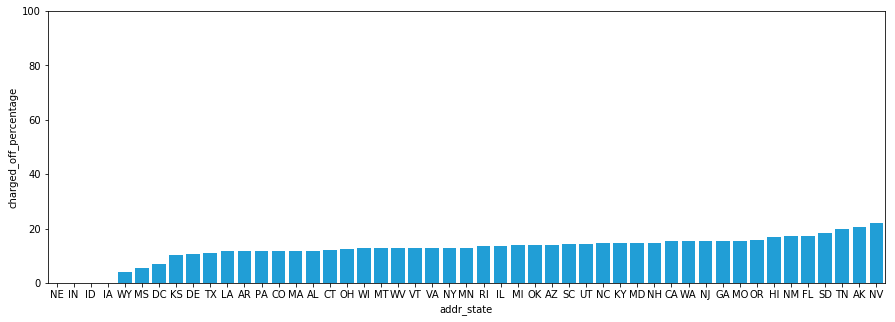

In [28]:
# Plot for charged off percentage w.r.t. The state provided by the borrower in the loan application.
plt.figure(figsize = (15,5))
plt.ylim(0, 100)
sns.barplot(x="addr_state", y="charged_off_percentage", data=perform_univariate_analysis('addr_state'), color="#03A9F4")
plt.show()

**Plot shows no significant pattern/variation in charged off percentage w.r.t. The state provided by the borrower in the loan application.**
**For some states we have less data (1,2 values) and thus we see some dips in plot.**

In [29]:
# Disrtibution of charged off percentage and fully paid percentage w.r.t. zip_code (The first 3 numbers of the zip code provided by the borrower in the loan application.)
perform_univariate_analysis('zip_code')

,zip_code,Charged Off Count,Fully Paid Count,Total Count,charged_off_percentage,fully_paid_percentage
0,7,0,1,1,0.00,100.00
349,397,0,1,1,0.00,100.00
348,396,0,1,1,0.00,100.00
347,395,0,3,3,0.00,100.00
345,392,0,3,3,0.00,100.00
344,391,0,1,1,0.00,100.00
343,390,0,2,2,0.00,100.00
342,388,0,1,1,0.00,100.00
341,386,0,1,1,0.00,100.00
350,398,0,3,3,0.00,100.00


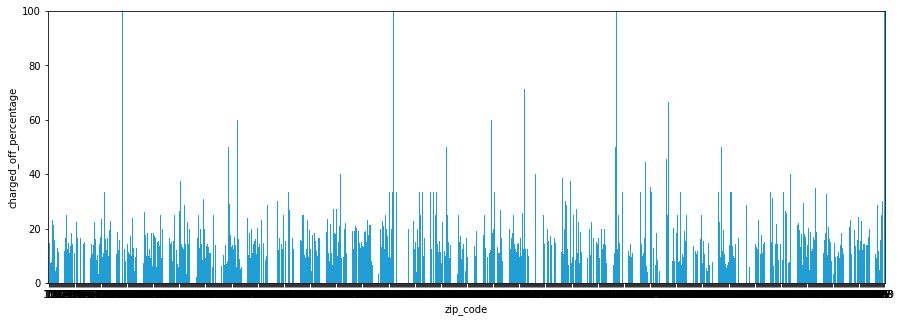

In [30]:
# Plot for charged off percentage w.r.t. The first 3 numbers of the zip code provided by the borrower in the loan application.
plt.figure(figsize = (15,5))
plt.ylim(0, 100)
sns.barplot(x="zip_code", y="charged_off_percentage", data=perform_univariate_analysis('zip_code'), color="#03A9F4")
plt.show()

**Plot shows no significant pattern/variation in charged off percentage w.r.t. The first 3 numbers of the zip code provided by the borrower in the loan application.**
**Some spikes and dips are observed due to less values in our dataset and cannot be corelated to default of loan**

In [31]:
# Disrtibution of charged off percentage and fully paid percentage w.r.t. emp_length (Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.)
perform_univariate_analysis('emp_length')

,emp_length,Charged Off Count,Fully Paid Count,Total Count,charged_off_percentage,fully_paid_percentage
9,9 years,147,1030,1177,12.49,87.51
2,2 years,529,3554,4083,12.96,87.04
4,4 years,427,2781,3208,13.31,86.69
10,< 1 year,530,3449,3979,13.32,86.68
3,3 years,521,3312,3833,13.59,86.41
0,1 year,409,2551,2960,13.82,86.18
5,5 years,422,2623,3045,13.86,86.14
6,6 years,287,1776,2063,13.91,86.09
8,8 years,191,1170,1361,14.03,85.97
7,7 years,248,1390,1638,15.14,84.86


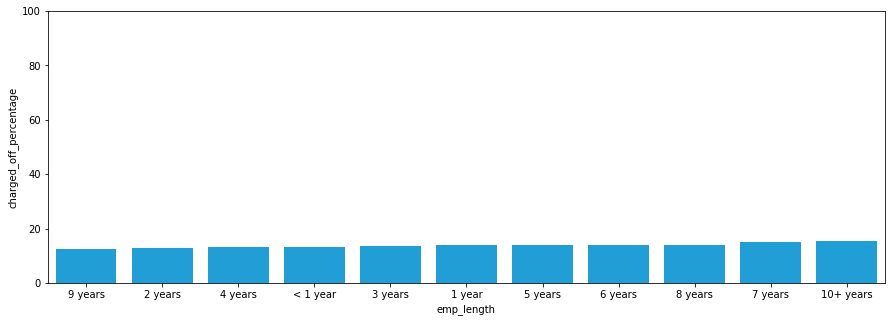

In [32]:
# Plot for charged off percentage w.r.t. Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
plt.figure(figsize = (15,5))
plt.ylim(0, 100)
sns.barplot(x="emp_length", y="charged_off_percentage", data=perform_univariate_analysis('emp_length'), color="#03A9F4")
plt.show()

**Plot shows no significant pattern/variation in charged off percentage w.r.t. Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.**

In [33]:
# Disrtibution of charged off percentage and fully paid percentage w.r.t. LC assigned loan grade.
perform_univariate_analysis(['grade','sub_grade'])

,grade,sub_grade,Charged Off Count,Fully Paid Count,Total Count,charged_off_percentage,fully_paid_percentage
0,A,A1,23,982,1005,2.29,97.71
1,A,A2,63,1293,1356,4.65,95.35
2,A,A3,80,1551,1631,4.90,95.10
3,A,A4,158,2504,2662,5.94,94.06
4,A,A5,189,2298,2487,7.60,92.40
5,B,B1,141,1473,1614,8.74,91.26
6,B,B2,191,1634,1825,10.47,89.53
7,B,B3,307,2282,2589,11.86,88.14
8,B,B4,283,1964,2247,12.59,87.41
9,B,B5,331,2114,2445,13.54,86.46


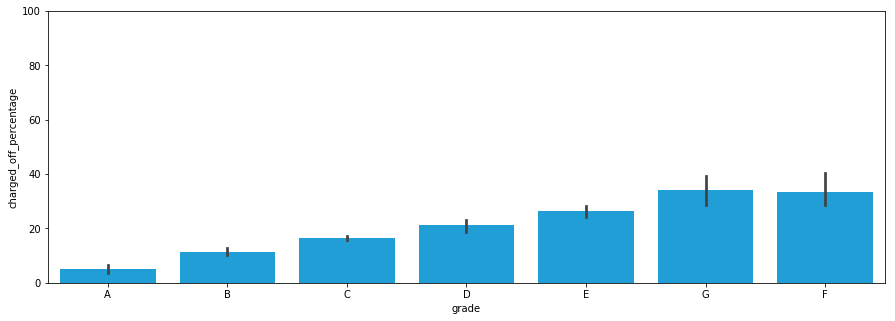

In [34]:
# Plot for charged off percentage w.r.t. LC assigned loan grade and loan subgrade.
plt.figure(figsize = (15,5))
plt.ylim(0, 100)
sns.barplot(x="grade", y="charged_off_percentage", data=perform_univariate_analysis(['grade','sub_grade']), color="#03A9F4")
plt.show()

**Plot shows a significant pattern/variation in charged off percentage w.r.t. LC assigned loan grade and loan subgrade.**

In [35]:
# Disrtibution of charged off percentage and fully paid percentage w.r.t. The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
perform_univariate_analysis('home_ownership')

,home_ownership,Charged Off Count,Fully Paid Count,Total Count,charged_off_percentage,fully_paid_percentage
0,MORTGAGE,2062,13643,15705,13.13,86.87
2,OWN,346,2162,2508,13.80,86.20
3,RENT,2518,14551,17069,14.75,85.25
1,OTHER,18,76,94,19.15,80.85


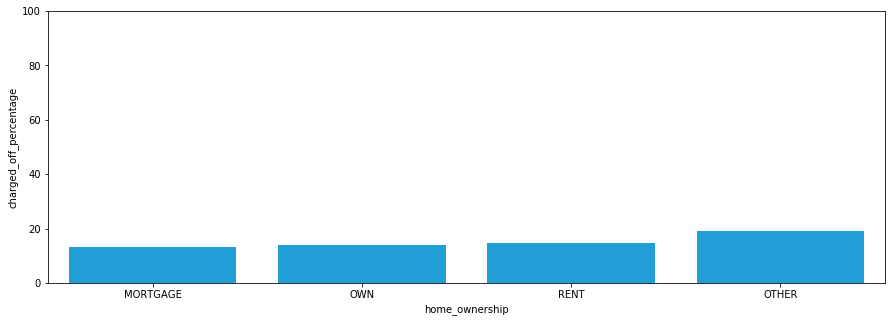

In [36]:
# Plot for charged off percentage w.r.t. The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
plt.figure(figsize = (15,5))
plt.ylim(0, 100)
sns.barplot(x="home_ownership", y="charged_off_percentage", data=perform_univariate_analysis('home_ownership'), color="#03A9F4")
plt.show()

**Plot shows a slight significant pattern/variation in charged off percentage w.r.t. The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.**
**Borroweres with OTHER as home ownership status have slightly higher charged off percentage**

In [37]:
# Disrtibution of charged off percentage and fully paid percentage w.r.t. The job title supplied by the Borrower when applying for the loan.
perform_univariate_analysis('emp_title')

,emp_title,Charged Off Count,Fully Paid Count,Total Count,charged_off_percentage,fully_paid_percentage
0,OLD PALM INC,0,1,1,0.0,100.0
16641,OCR SERVICES,0,1,1,0.0,100.0
16640,OCONNELL ELECTRIC COMPANY,0,1,1,0.0,100.0
16639,OCONEE PHYSICIAN PRACTICES,0,1,1,0.0,100.0
16638,OCO ARCHITECTS,0,2,2,0.0,100.0
16637,OCM LEE HECHT HARRISON,0,1,1,0.0,100.0
16636,OCLC,0,1,1,0.0,100.0
16635,OCHSNER CLINIC FOUNDATION,0,1,1,0.0,100.0
16634,OCHSNER CLINC,0,1,1,0.0,100.0
16632,OCEANSIDE UNIFIED SCHOOL DISTRICT,0,1,1,0.0,100.0


**From the table we cannot conclude any significant pattern/variation in charged off percentage w.r.t. The job title supplied by the Borrower when applying for the loan.**

**ii) Performing analysis for quantitative value (continuous) fields (columns)**

annual_inc, collection_recovery_fee, delinq_2yrs, dti, funded_amnt, funded_amnt_inv, inq_last_6mths, installment, int_rate,last_pymnt_amnt, loan_amnt, open_acc, pub_rec, pub_rec_bankruptcies, recoveries, revol_bal, revol_util, total_acc, total_pymnt, total_pymnt_inv, total_rec_int, total_rec_late_fee, total_rec_prncp

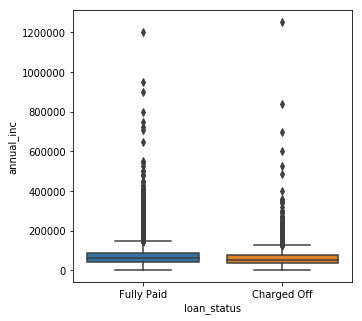

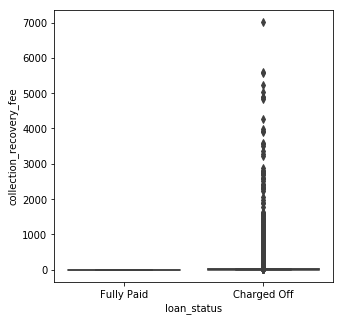

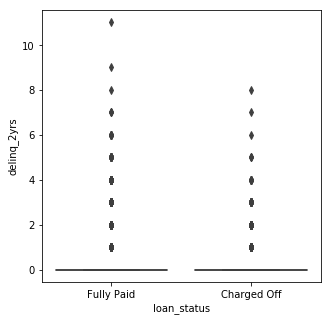

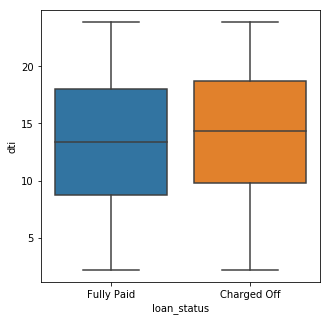

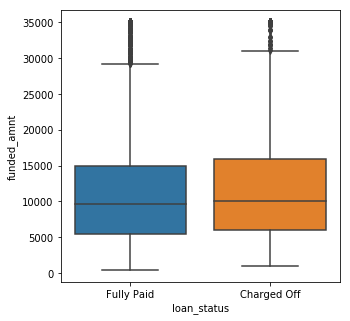

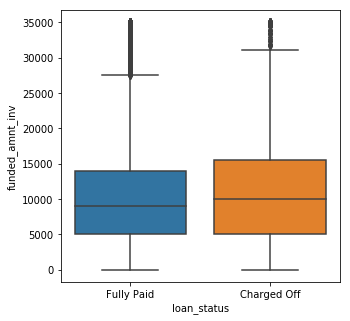

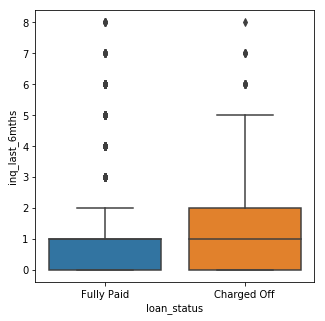

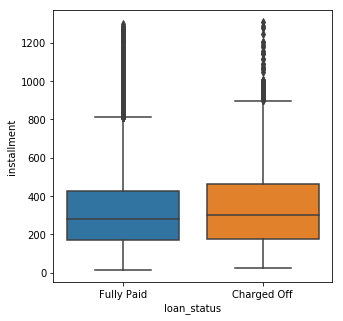

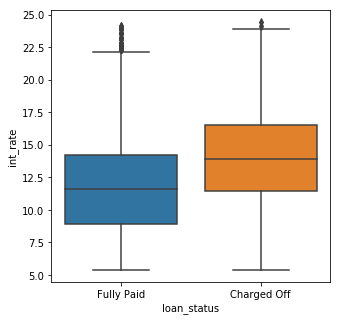

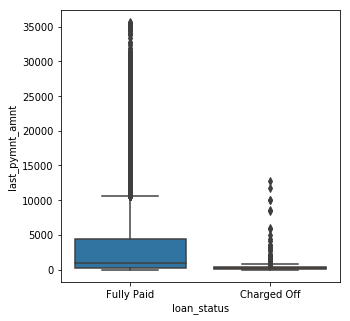

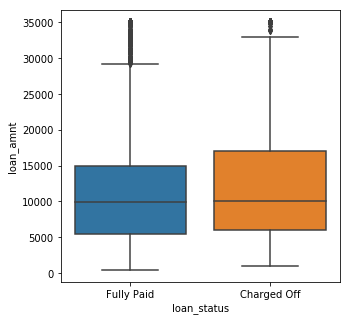

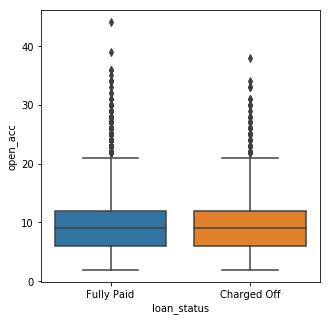

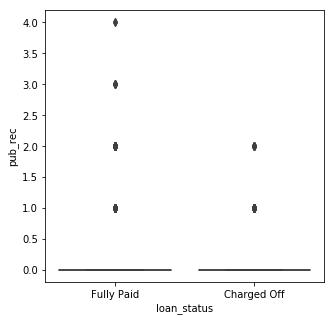

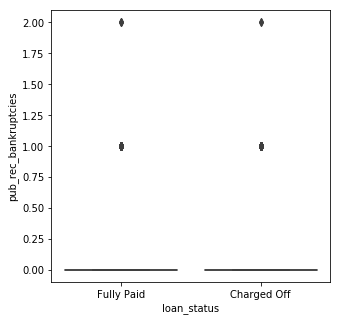

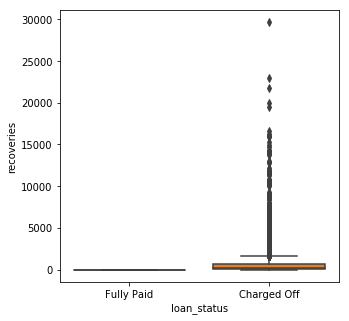

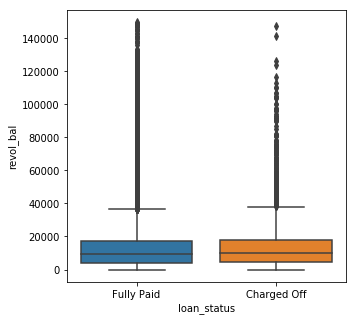

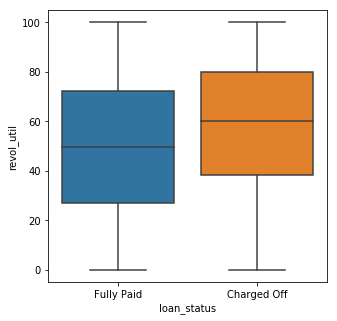

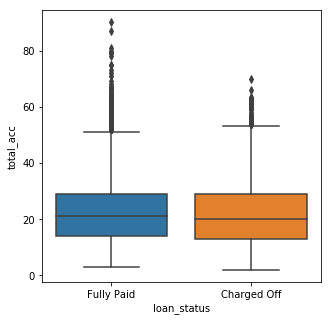

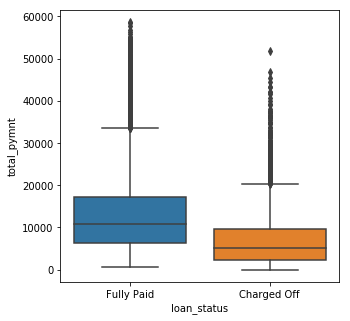

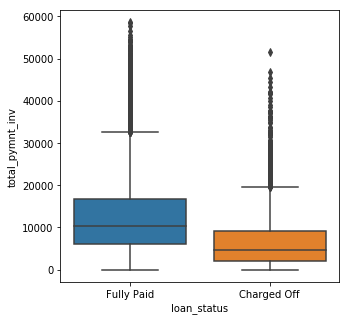

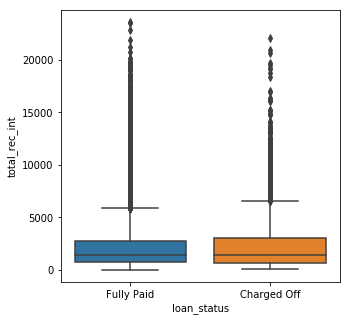

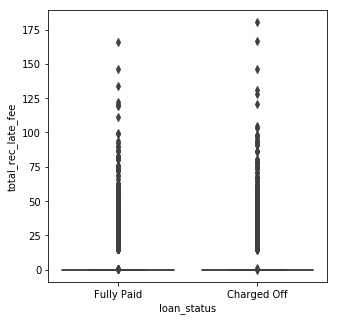

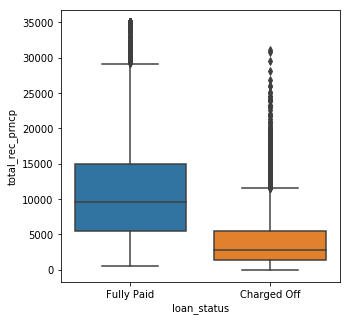

In [38]:
fields = [
    'annual_inc', 'collection_recovery_fee', 'delinq_2yrs', 'dti', 'funded_amnt',
    'funded_amnt_inv', 'inq_last_6mths', 'installment', 'int_rate', 
    'last_pymnt_amnt', 'loan_amnt', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'recoveries',
    'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
    'total_rec_late_fee', 'total_rec_prncp']
for f in fields:
    # Plot to compare impact of field on loan status.
    plt.figure(figsize=(5,5))
    low, high = df_loan.dti.quantile([0.05, 0.95])
    ax = sns.boxplot(x='loan_status', y=f, data=df_loan[df_loan.dti.between(low,high)])
    plt.show()

**Noticable Inferences derived from these plots**
Following fields (columns) relate to more likely to default on loans:
    1. LESSER annual income (The self-reported annual income provided by the borrower during registration.) 
    2. HIGHER dti (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.)
    3. HIGHER inq_last_6mths (The number of inquiries in past 6 months (excluding auto and mortgage inquiries).)
    4. HIGHER int_rate (Interest Rate on the loan)
    5. LESSER last_pymnt_amnt (Last month payment was received.)
    6. HIGHER loan_amnt (The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.	)
    7. HIGHER revol_util (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.)
    8. LESSER total_acc (The total number of credit lines currently in the borrower's credit file)
    9. LESSER total_pymnt (Payments received to date for total amount funded)
    10. LESSER total_pymnt_inv (Payments received to date for portion of total amount funded by investors)
    11. LESSER total_rec_prncp (Principal received to date)

**Combining all fields (columns), categorical as well as quantitative fields that individually have any co-relation with the loan_status**

**Loan status is related to the following fields:**
1. grade & sub_grade (LC assigned loan grade and loan subgrade.)
2. home_ownership (The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.)
3. annual_inc (The self-reported annual income provided by the borrower during registration.)
4. dti (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.)
5. inq_last_6mths (The number of inquiries in past 6 months (excluding auto and mortgage inquiries).)
6. int_rate (Interest Rate on the loan)
7. last_pymnt_amnt (Last month payment was received.)
8. loan_amnt (The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.	)
9. revol_util (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.)
10. total_acc (The total number of credit lines currently in the borrower's credit file)
11. total_pymnt (Payments received to date for total amount funded)
12. total_pymnt_inv (Payments received to date for portion of total amount funded by investors)
13. total_rec_prncp (Principal received to date)


**A Business-metric, combination of several individual parameters can be created to get better co-relation to loan_status field**

In [39]:
# loan to income ratio


**Plotting co-relation between all quantitative fields (columns)**

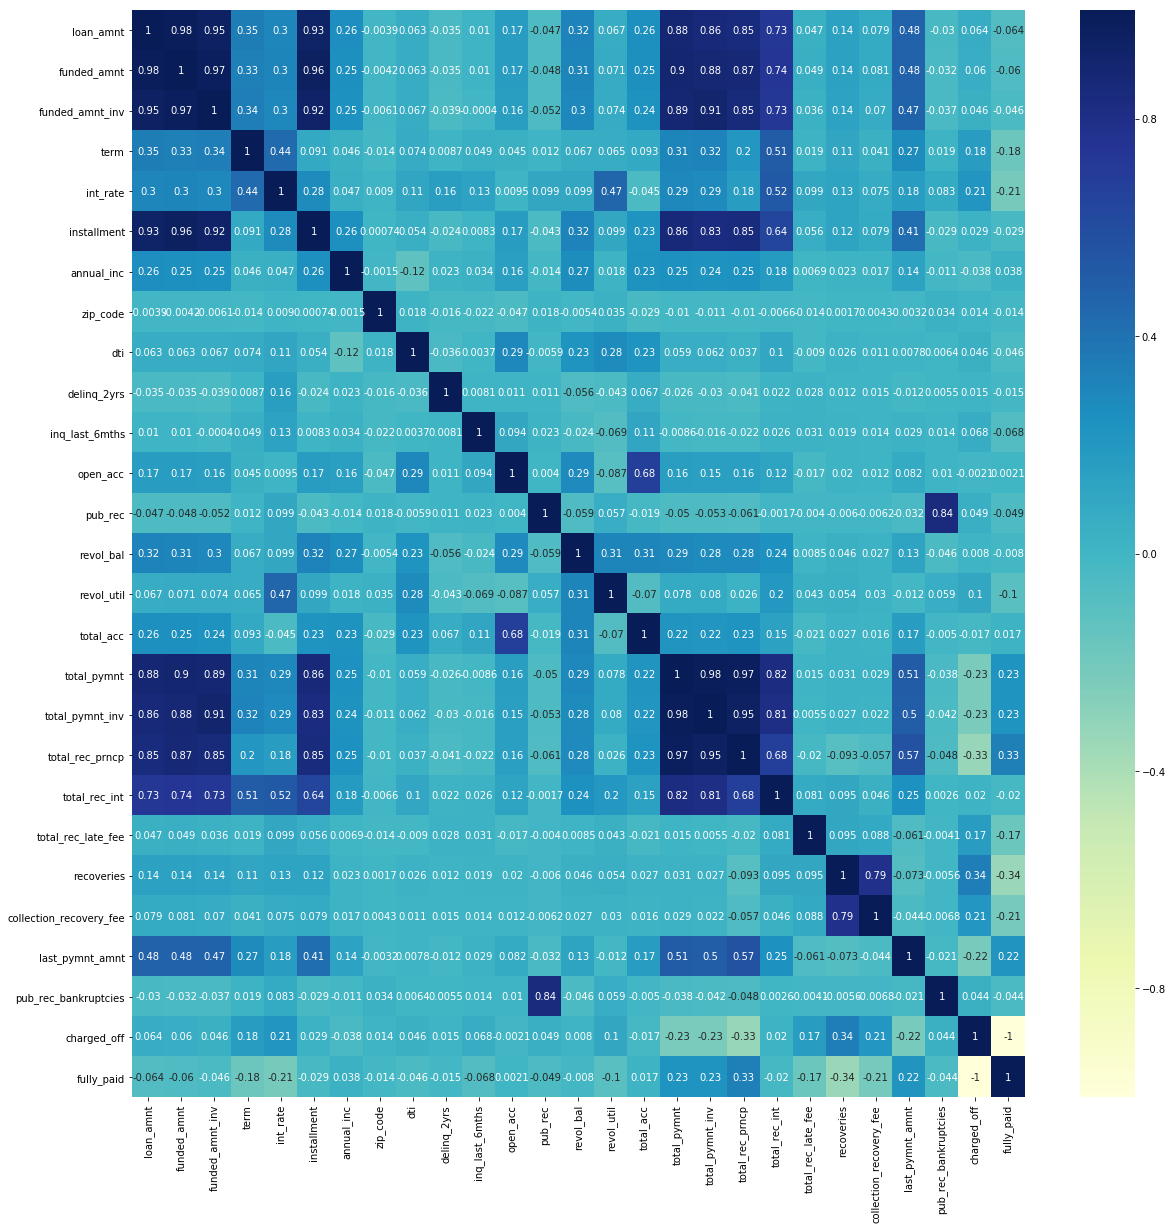

In [40]:
plt.figure(figsize = (20,20))
sns.heatmap(df_loan.corr(),annot=True, cmap="YlGnBu")
plt.show()

**Plotting co-relation between selected quantitative fields (columns) i.e. fields that were related to loan status**

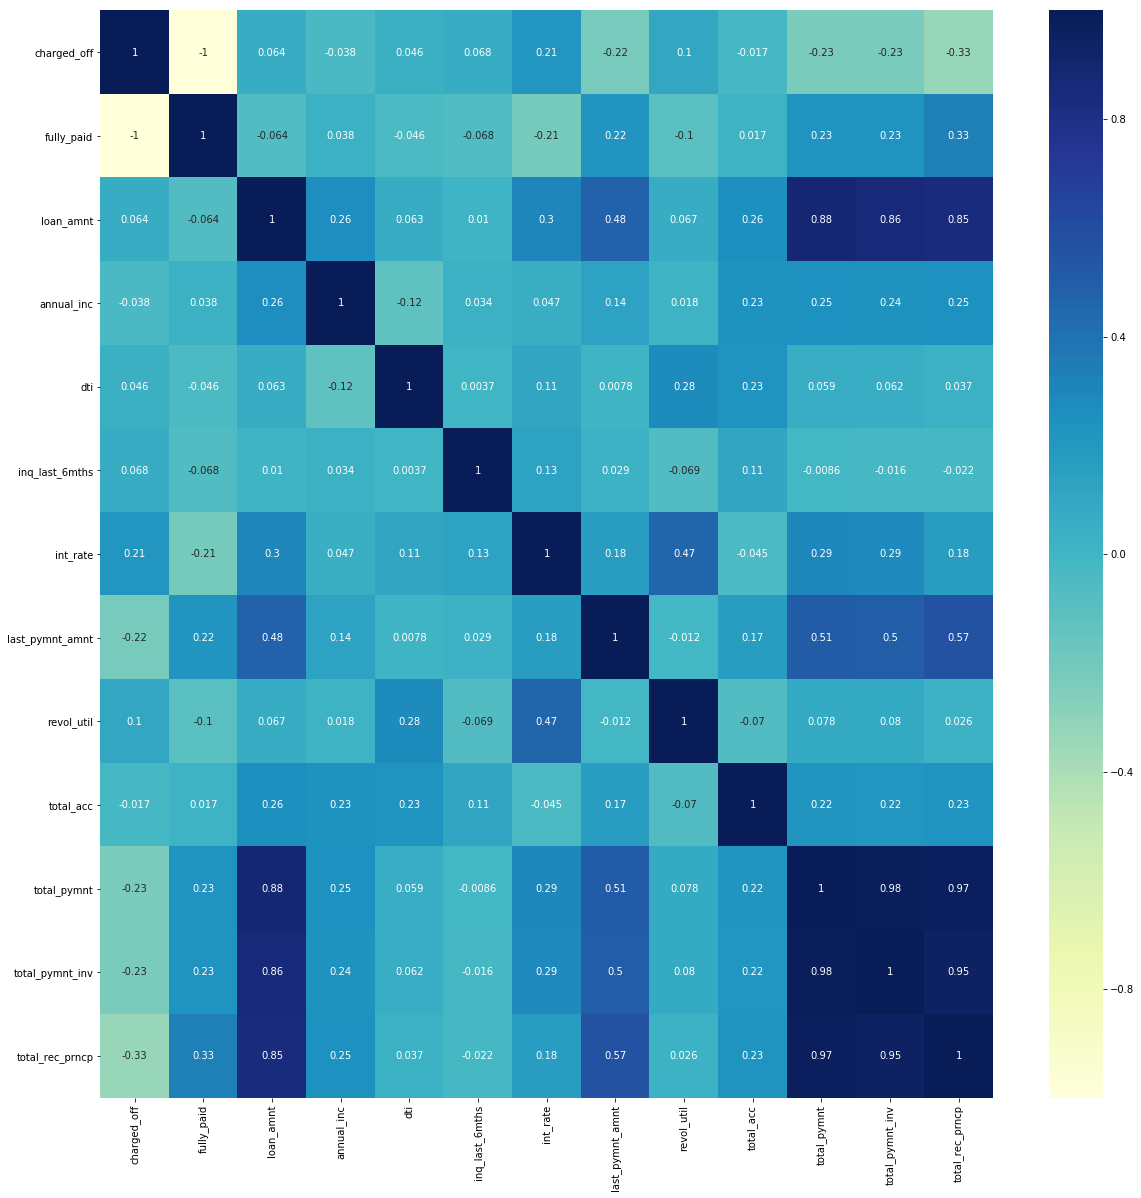

In [41]:
df = df_loan[['charged_off','fully_paid','loan_amnt','annual_inc','dti','inq_last_6mths','int_rate','last_pymnt_amnt','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp']]
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

### Final Inference (combining our analysis)

**Loan status is related to the following fields:**
    1. grade & sub_grade (LC assigned loan grade and loan subgrade.)
        HIGHER (alphabatically higher i.e. B>A) grade & sub_grade relates to more likely to default on loans.
    2. home_ownership (The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.)
        OTHER status relates to more likely to default on loans.**But overall it does not have any significant impact.**
    3. total_rec_prncp (Principal received to date)
        LESSER total_rec_prncp relates to more likely to default on loans.
    4. total_pymnt_inv (Payments received to date for portion of total amount funded by investors)
        LESSER total_pymnt_inv relates to more likely to default on loans.
    5. total_pymnt (Payments received to date for total amount funded)
        LESSER total_pymnt relates to more likely to default on loans.
    6. last_pymnt_amnt (Last month payment was received.)
        LESSER last_pymnt_amnt relates to more likely to default on loans.
    7. int_rate (Interest Rate on the loan)
        HIGHER int_rate relates to more likely to default on loans.
    8. revol_util (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.)
        HIGHER revol_util relates to more likely to default on loans.
    9. inq_last_6mths (The number of inquiries in past 6 months (excluding auto and mortgage inquiries).)
        HIGHER inq_last_6mths relates to more likely to default on loans.
    10. loan_amnt (The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.)
        HIGHER loan_amnt relates to more likely to default on loans.
    11. dti (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.)
        HIGHER dti relates to more likely to default on loans.
    12. annual_inc (The self-reported annual income provided by the borrower during registration.)
        LESSER annual income relates to more likely to default on loans.
    13. total_acc (The total number of credit lines currently in the borrower's credit file)
        LESSER total_acc relates to more likely to default on loans.
